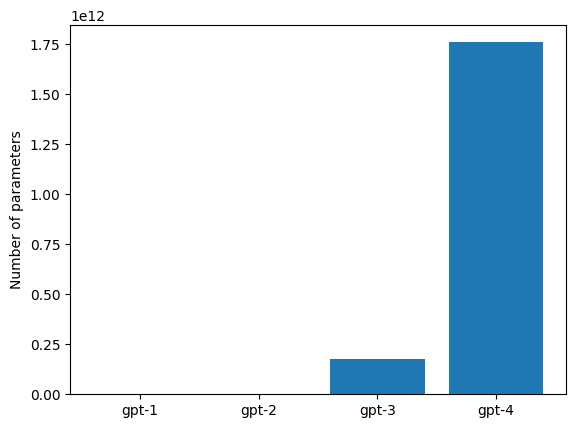

In [4]:
gpt_model_parameters = {"gpt-1": 117000000, "gpt-2": 1500000000, "gpt-3":175000000000, "gpt-4":1760000000000}
# plot this dictionary as a bar chart
import matplotlib.pyplot as plt
plt.bar(gpt_model_parameters.keys(), gpt_model_parameters.values())
plt.ylabel("Number of parameters")
plt.show()


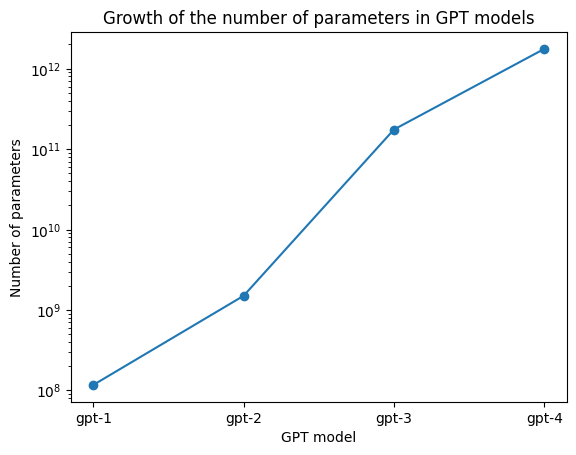

In [7]:
# Show that the growth of the number of parameters is exponential, and make the plot look nice
import numpy as np
x = np.arange(1, 5)
y = [gpt_model_parameters[f"gpt-{i}"] for i in x]
plt.plot(x, y, marker="o")
plt.yscale("log")
plt.ylabel("Log number of parameters")
plt.xlabel("GPT model")
plt.xticks(x, [f"gpt-{i}" for i in x])
plt.title("Growth of the number of parameters in GPT models")
plt.show()


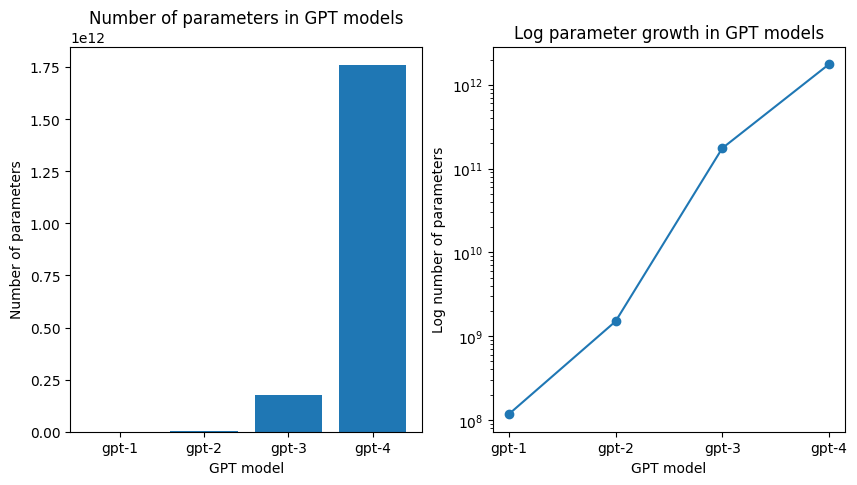

In [9]:
# Set the previous two plots up side by side ands make them look nice
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(gpt_model_parameters.keys(), gpt_model_parameters.values())
axs[0].set_ylabel("Number of parameters")
axs[0].set_xlabel("GPT model")
axs[0].set_title("Number of parameters in GPT models")
axs[1].plot(x, y, marker="o")
axs[1].set_yscale("log")
axs[1].set_ylabel("Log number of parameters")
axs[1].set_xlabel("GPT model")
axs[1].set_xticks(x)
axs[1].set_xticklabels([f"gpt-{i}" for i in x])
axs[1].set_title("Log parameter growth in GPT models")
plt.show()


{'gpt-1': 117000000, 'gpt-2': 1500000000, 'gpt-3': 175000000000, 'gpt-4': 1760000000000, 'gpt-5': 44106.493966443566}


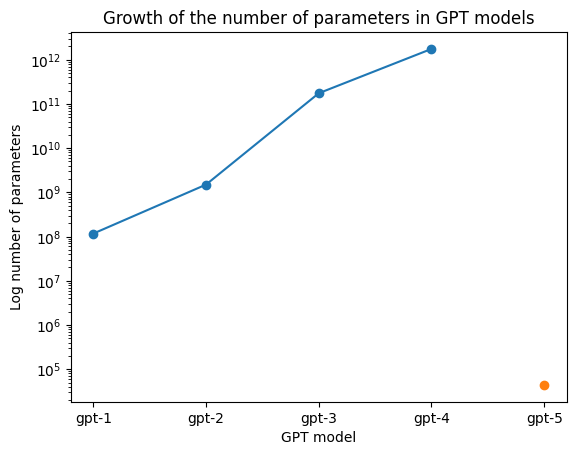

In [13]:
# Estimate the number of parameters for GPT-5 based on the data for the previous models
gpt_model_parameters = {"gpt-1": 117000000, "gpt-2": 1500000000, "gpt-3":175000000000, "gpt-4":1760000000000}
x = np.arange(1, 5)
y = [gpt_model_parameters[f"gpt-{i}"] for i in x]

from scipy.optimize import curve_fit
def exponential(x, a, b):
    return a * np.exp(b * x)




popt, _ = curve_fit(exponential, x, y)
gpt_model_parameters["gpt-5"] = exponential(5, *popt)
print(gpt_model_parameters)
plt.plot(x, y, marker="o")
plt.plot(5, gpt_model_parameters["gpt-5"], marker="o")
plt.yscale("log")
plt.ylabel("Log number of parameters")
plt.xlabel("GPT model")
plt.xticks(np.append(x, 5), [f"gpt-{i}" for i in np.append(x, 5)])
plt.title("Growth of the number of parameters in GPT models")
plt.show()


{'gpt-1': 117000000, 'gpt-2': 1500000000, 'gpt-3': 175000000000, 'gpt-4': 1760000000000, 'gpt-5': 68067337885992.53}


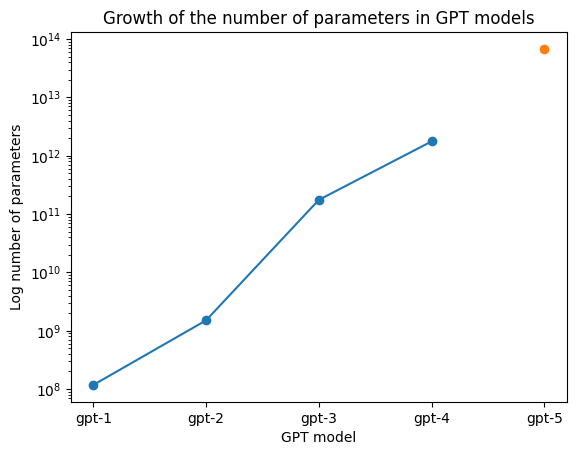

In [14]:
# The above is obviously wrong, as GPT-5 should be bigger than GPT-4.
# Let's try to fit a linear model to the log of the number of parameters
def linear(x, a, b):
    return a * x + b

popt, _ = curve_fit(linear, x, np.log(y))
gpt_model_parameters["gpt-5"] = np.exp(linear(5, *popt))
print(gpt_model_parameters)
plt.plot(x, y, marker="o")
plt.plot(5, gpt_model_parameters["gpt-5"], marker="o")
plt.yscale("log")
plt.ylabel("Log number of parameters")
plt.xlabel("GPT model")
plt.xticks(np.append(x, 5), [f"gpt-{i}" for i in np.append(x, 5)])
plt.title("Growth of the number of parameters in GPT models")
plt.show()


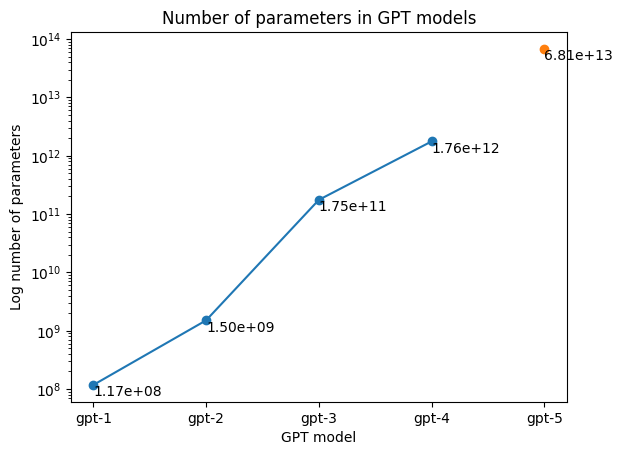

In [20]:
# Show the same plot as above, but with the number of parameters written on the points in scientific notation
plt.plot(x, y, marker="o")
plt.plot(5, gpt_model_parameters["gpt-5"], marker="o")
plt.yscale("log")
plt.ylabel("Log number of parameters")
plt.xlabel("GPT model")
plt.xticks(np.append(x, 5), [f"gpt-{i}" for i in np.append(x, 5)])
plt.title("Number of parameters in GPT models")
for i in np.append(x, 5):
    plt.text(i, gpt_model_parameters[f"gpt-{i}"], f"{gpt_model_parameters[f'gpt-{i}']:.2e}", ha="left", va="top")
plt.show()


